## <font size = 10> Hottest Topics and Their Trend </font>

## PART ONE: Exploratory Data Analysis
1. Header analysis
2. News count time series
3. Top author distribution

In [322]:
import csv

with open("./Eluvio_DS_Challenge.csv","r") as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter= ",")
    headers = csv_reader.fieldnames
    #print(headers)
    
    #some column may not have recurrent value
    removed_list = ['time_created','title']
    
    record = {}
    for h in headers:
        record[h] = dict()
        
    #if it's really big, we can count column by column
    for row in csv_reader:
        for key,value in row.items():
            if key == 'date_created':
                date_parse = value.split('-')
                value = date_parse[0]+'-'+date_parse[1]
            if key not in removed_list:
                record[key][value] = record[key].get(value,0)+1

In [61]:
for r in headers:
    print(r+": "+str(len(record[r])))

time_created: 0
date_created: 107
up_votes: 5782
down_votes: 1
title: 0
over_18: 2
author: 85838
category: 1


In [140]:
#First is to see the distribution of the news along time stamp(per month)
import matplotlib.pyplot as plt
import numpy as np
def plot_news_distribution(time_stamp, news_count,title,color):
    fig = plt.figure(figsize=(14,6))
    ax1 = fig.add_axes([0,0,1,1])
    ax1.set_title('News Distribution ' + title,fontsize=20)
    ax1.plot(time_stamp,news_count,color=color)
    interval = np.arange(0,len(time_stamp),10)
    plt.xticks(np.arange(0,len(time_stamp),10),[time_stamp[i] for i in interval])
    plt.show()
    
time_stamp = []
for key,value in record['date_created'].items():
    time_stamp.append(key)
print(time_stamp)

['2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07'

In [120]:
with open("./Eluvio_DS_Challenge.csv","r") as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter= ",")
    distribution_total = dict()
    for row in csv_reader:
        date = row['date_created'].split('-')
        date = date[0]+'-'+date[1]
        distribution_total[date] = distribution_total.get(date,0)+1
    news_count_total = [distribution_total[k] for k in time_stamp]

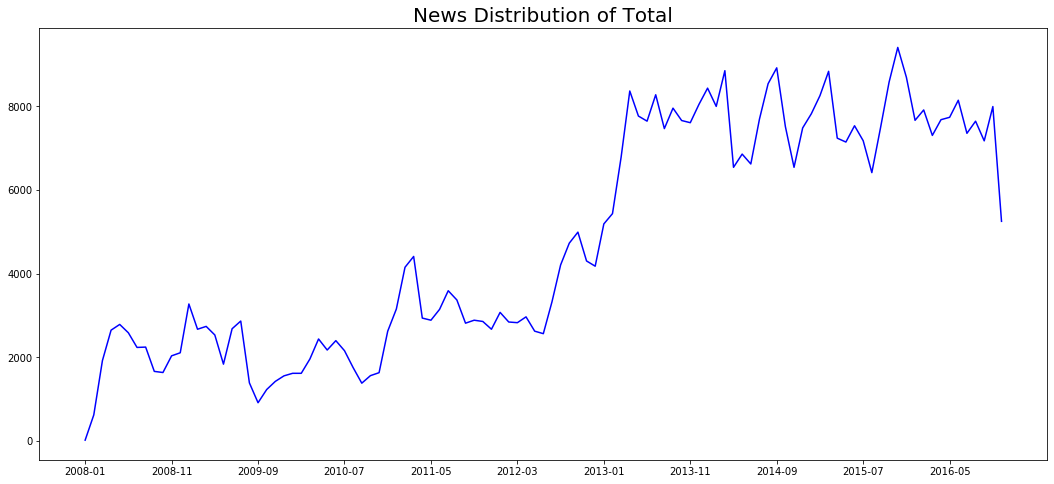

In [141]:
plot_news_distribution(time_stamp, news_count_total,'of Total', 'blue')

In [226]:
#some authors must have more than one news, print top 10
from collections import OrderedDict
sort_author = OrderedDict(sorted(record['author'].items(),key=lambda x:x[1],reverse=True))
count = 0
authors = []
authors_counts = []
for key,value in sort_author.items():
    if count >20:
        break
    authors.append(key)
    authors_counts.append(value)
    count += 1

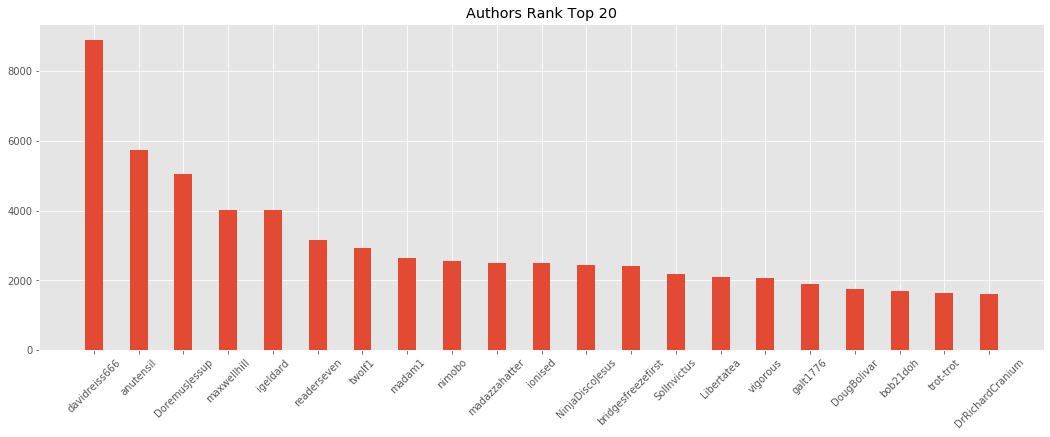

In [230]:
def plot_bar(x_, y_,title,x_label):
    x_pos = np.arange(len(x_))
    plt.figure(figsize=(18,6))
    plt.bar(x_pos,y_,width = 0.4)
    plt.xticks(x_pos,x_,rotation=45)
    plt.title(title)
    plt.show()
    
plot_bar(authors,authors_counts,"Authors Rank Top 20","authors")

In [171]:
#we may have some interests on the distribution of each author, we can take one for example:
example_author = "davidreiss666"
def author_trend_analysis(author,color):
    distribution_author = dict()
    for key,values in record['date_created'].items():
        distribution_author[key] = 0
    with open("./Eluvio_DS_Challenge.csv","r") as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter= ",")
        for row in csv_reader:
            date = row['date_created'].split('-')
            date = date[0]+'-'+date[1]
            if row['author'] == author:
                distribution_author[date] = distribution_author.get(date,0)+1
        news_count = [distribution_author[k] for k in time_stamp]
    plot_news_distribution(time_stamp, news_count,'of Author: '+ author, color)

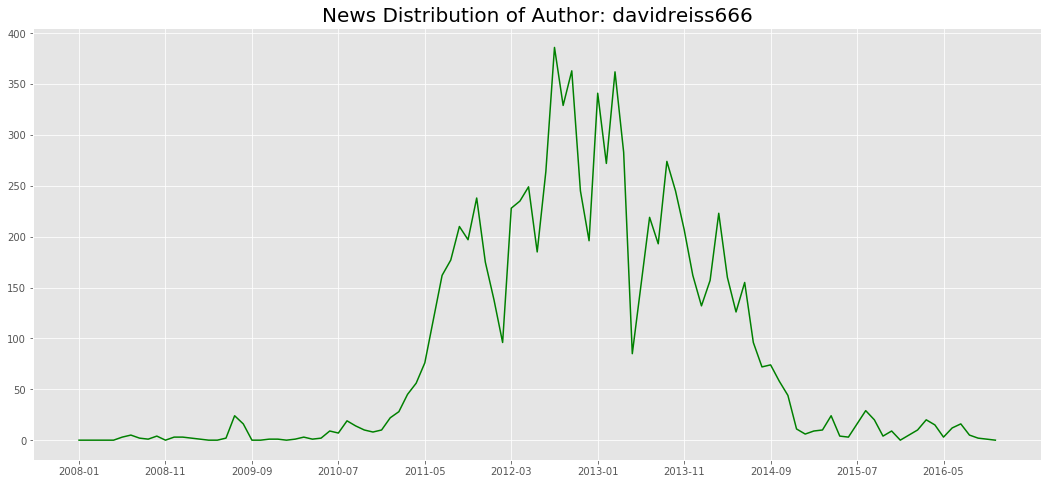

In [194]:
author_trend_analysis(example_user,'green')


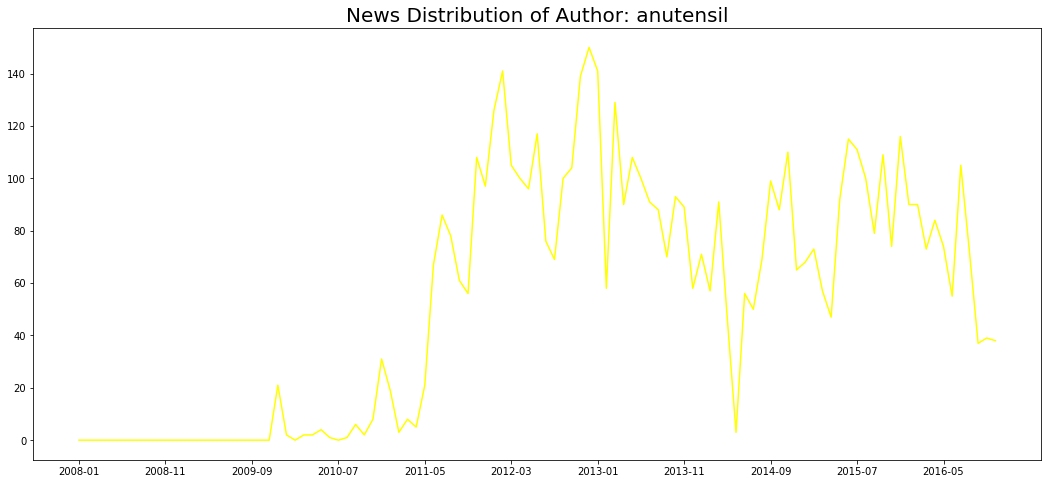

In [143]:
author_trend_analysis('anutensil','yellow')

## PART TWO: Topic Model Analysis
1. Data Preprocessing for LDA. There is an individual program for doing this. 
    Details please refer to src/data_preprocessing.py


2. Run LDA. Almost all of the lda package requires the data to be loaded into memory at once. 
   So I adapted one open sourced LDA code into the one can run with data larger than the RAM. 
   The source code is provided within the same directory. 
   Details please refer to ./GibbsLDAPlusPlus_large_scale.


3. The topic analysis will be divided into serveral parts
    * A visualization of word cloud for each topic
    * The hostest topic based on two metrics till now: weighted with upvotes or without upvotes
    * The topic trends of an author along time
 

In [513]:
#since we have got the topics from the topic model, let's take a look of the topics
topics_file = open("./GibbsLDAPlusPlus_Large_Scale/models/data/model-final.twords","r")
line = topics_file.readline()
twords = []
portions = []
while line:
    w = []
    p = ""
    for i in range(10):
        line = topics_file.readline()
        line = line.strip().split(' ')
        w.append(line[0])
        p += line[3]
        p += ' '
    twords.append(w)
    portions.append(np.fromstring(p,dtype=float,sep=' '))
    line = topics_file.readline()
topics_file.close()

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def topic_cloud_graph(row,col,start):
    fig1, ax = plt.subplots(row,col,figsize=(14,8))
    fig1.set_figure
    for i in range(row*col):
        wordcloud = WordCloud(width = 1600, height = 1600,
                          #background_color='white',
                          background_color="rgba(255, 255, 255, 0)", mode="RGBA",
                          stopwords = stopwords,
                          min_font_size = 10).generate(' '.join(twords[(start+i)%100]))
        x_ = int(i/col)
        y_ = i%col
        #ax[x_,y_].set_figure(fig_)
        ax[x_,y_].imshow(wordcloud)
        ax[x_,y_].axis("off")
        plt.tight_layout(pad = 0)
        ax[x_,y_].set_title("topic:"+str((start+i)%100),fontsize=20)
    plt.show()

In [514]:
def topic_cloud_graph_single(idx):
    plt.figure(figsize=(8,4))
    wordcloud = WordCloud(width = 1600, height = 1600,
                          background_color='white',
                          stopwords = stopwords,
                          min_font_size = 10).generate(' '.join(twords[idx]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title('topic: '+str(idx),fontsize=20)
    plt.show()

## TOPIC WORD CLOUDS

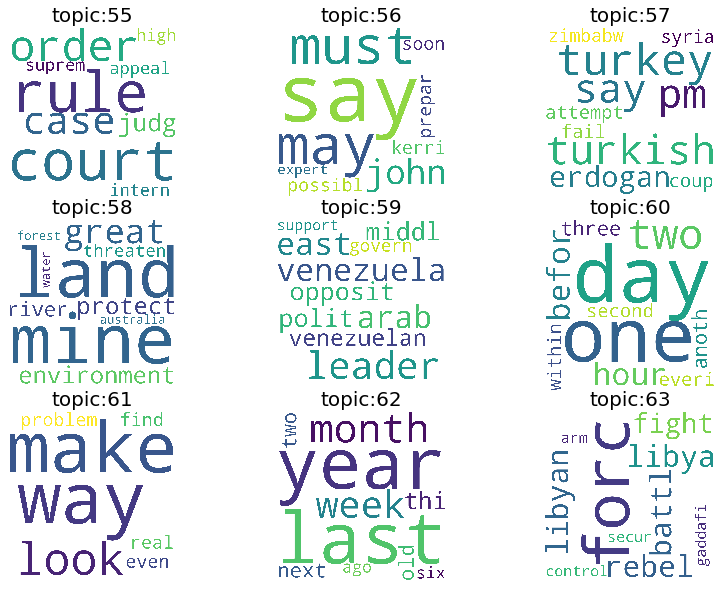

In [515]:
topic_cloud_graph(3,3,55)

In [471]:
#load the article index for each authors
def load_index(author):
    with open("./data/author_index.dat","r") as ai_file:
        line = ai_file.readline()
        while line:
            content = ai_file.readline()
            if line.strip() == author:
                return [int(l) for l in content.strip().split(' ')]
            line = ai_file.readline()
            
def load_upvote_by_index(author_index):
    with open("./data/upvote_index.dat","r") as ui_file:
        line = 0
        index_pointer = 0
        upvote_index = {}
        content = ui_file.readline()
        while content and index_pointer < len(author_index):
            if line == author_index[index_pointer]:
                upvote_index[line] = (int(content.strip()))
                index_pointer += 1
            content = ui_file.readline()
            line += 1
        return upvote_index
            

In [472]:
#category index by their date
def category_index_by_date(author_index,author_index_by_date):
    line = 0
    index_pointer = 0
    with open("./data/date_index.dat","r") as di_file:
        content = di_file.readline()
        while content and index_pointer < len(author_index):
            if line == author_index[index_pointer]:
                author_index_by_date[content.strip()].append(line)
                index_pointer += 1
            content = di_file.readline()
            line += 1
    return author_index_by_date


In [473]:
analysis_author = "davidreiss666"
author_index = load_index(analysis_author)
#category author article index by date
author_index_by_date = {}
for ts in time_stamp:
    author_index_by_date[ts] = []

In [474]:
author_index_by_date = category_index_by_date(author_index,author_index_by_date)
upvote_index = load_upvote_by_index(author_index)

In [475]:
#load theta files
def count_theta_delimiter(theta_files):
    count_start = []
    line = 0
    for f in theta_files:
        f_file = open(f,"r")
        count_start.append(line)
        content = f_file.readline()
        while content:
            line += 1
            content = f_file.readline()
        f_file.close()
    return count_start

In [476]:
#load topic distribution for 
import os
theta_dir = './GibbsLDAPlusPlus_Large_Scale/models/data/'
theta_files = [theta_dir+filename for filename in os.listdir(theta_dir) if filename.startswith("model-final.theta")]
lenth = len(theta_files)
theta_files.clear()
for i in range(lenth):
    theta_files.append(theta_dir+"model-final.theta."+str(i))
print(len(theta_files))

1355


In [477]:
theta_start = count_theta_delimiter(theta_files)

In [478]:
weighted_topic_upvote = np.zeros(100,dtype=float)
topic_upvote = np.zeros(100,dtype=float)
line = 0
upvote_file = open("./data/upvote_index.dat","r")
for tp in range(len(theta_files)):
    theta_file = open(theta_files[tp],"r")
    theta_read = theta_file.readline()
    while theta_read:
        row_value = [float(t) for t in theta_read.strip().split(' ')]
        row_value = np.array(row_value,dtype=float)
        upvote_read = upvote_file.readline()
        upvote_value = float(upvote_read.strip())
        weighted_topic_upvote += upvote_value*row_value
        topic_upvote += row_value
        theta_read = theta_file.readline()
    theta_file.close()
upvote_file.close()

## Which one is the Most Popular Topic of All
weighted by upvotes for each topic

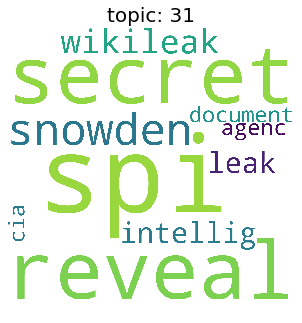

In [516]:
topic_id = np.argmax(weighted_topic_upvote)
topic_cloud_graph_single(topic_id)

## Which one is the topic most be mentioned?


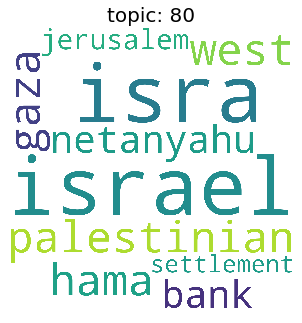

In [517]:
topic_id = np.argmax(topic_upvote)
topic_cloud_graph_single(topic_id)

In [500]:
#theta_start
#theta_files
#author_index_by_date
#upvote_index
#author_index
def find_index(idx):
    start = 0
    end = len(theta_start)-1
    while start + 1 < end:
        mid = start + ((end-start)>>1)
        if idx < theta_start[mid] :
            end = mid
        else:
            start = mid
    if idx >= theta_start[end]:
        return end
    else:
        return start

def get_topic_distribution(idx):
    index = find_index(idx)
    start = theta_start[index]
    with open(theta_files[index],"r") as tf_reader:
        rf = tf_reader.readline()
        while rf:
            if start == idx:
                return np.array([float(e) for e in rf.strip().split(' ')],dtype=float)
            start = start + 1
            rf = tf_reader.readline()

def get_the_most_mentioned_topic_date(date):
    index = author_index_by_date[date]
    topic_distri_accu = np.zeros(100,dtype=float)
    if len(index) == 0:
        return -1
    for ind in index:
        topic_distri_accu += get_topic_distribution(ind)
    return np.argmax(topic_distri_accu)

def get_the_most_popular_topic_date(date):
    index = author_index_by_date[date]
    index.sort()
    topic_distri_accu = np.zeros(100,dtype=float)
    if len(index) == 0:
        return -1
    upvote_value = load_upvote_by_index(index)
    for ind in index:
        topic_distri_accu = upvote_value[ind]*get_topic_distribution(ind)
    return np.argmax(topic_distri_accu)

In [572]:
def plot_news_distribution_with_topics(time_stamp, news_count,title,color,topic_list):
    fig = plt.figure(figsize=(22,10))
    ax1 = fig.add_axes([0,0,1,1])
    ax1.set_title('News Trend for Author: '+title,fontsize=20)
    ax1.plot(time_stamp,news_count,color=color)
    interval = np.arange(0,len(time_stamp),10)
    plt.xticks(np.arange(0,len(time_stamp),10),[time_stamp[i] for i in interval])
    for i in range(len(time_stamp)):
        if i%5 != 0:
            continue
        if topic_list[i] == -1:
            continue
        if topic_list[i] == topic_list[i-1]:
            continue
        x_ = float(i)/len(time_stamp)
        y_ = 0.8*(news_count[i]/max(news_count))
        axi = fig.add_axes([x_,y_,0.1,0.2])
        wordcloud = WordCloud(width = 400, height = 400,
                              #background_color='white',
                              background_color="rgba(255, 255, 255, 0)", mode="RGBA",
                              stopwords = stopwords,
                              min_font_size = 10).generate(' '.join(twords[topic_list[i]]))
        axi.axis("off")
        axi.imshow(wordcloud)
    plt.show()
    
#for ds in time_stamp:
    #print(ds + ' : ' + str(get_the_most_mentioned_topic_date(ds)) + ' : '+str(get_the_most_popular_topic_date(ds)))

## Topic Change Along Time Zone for a specific Author

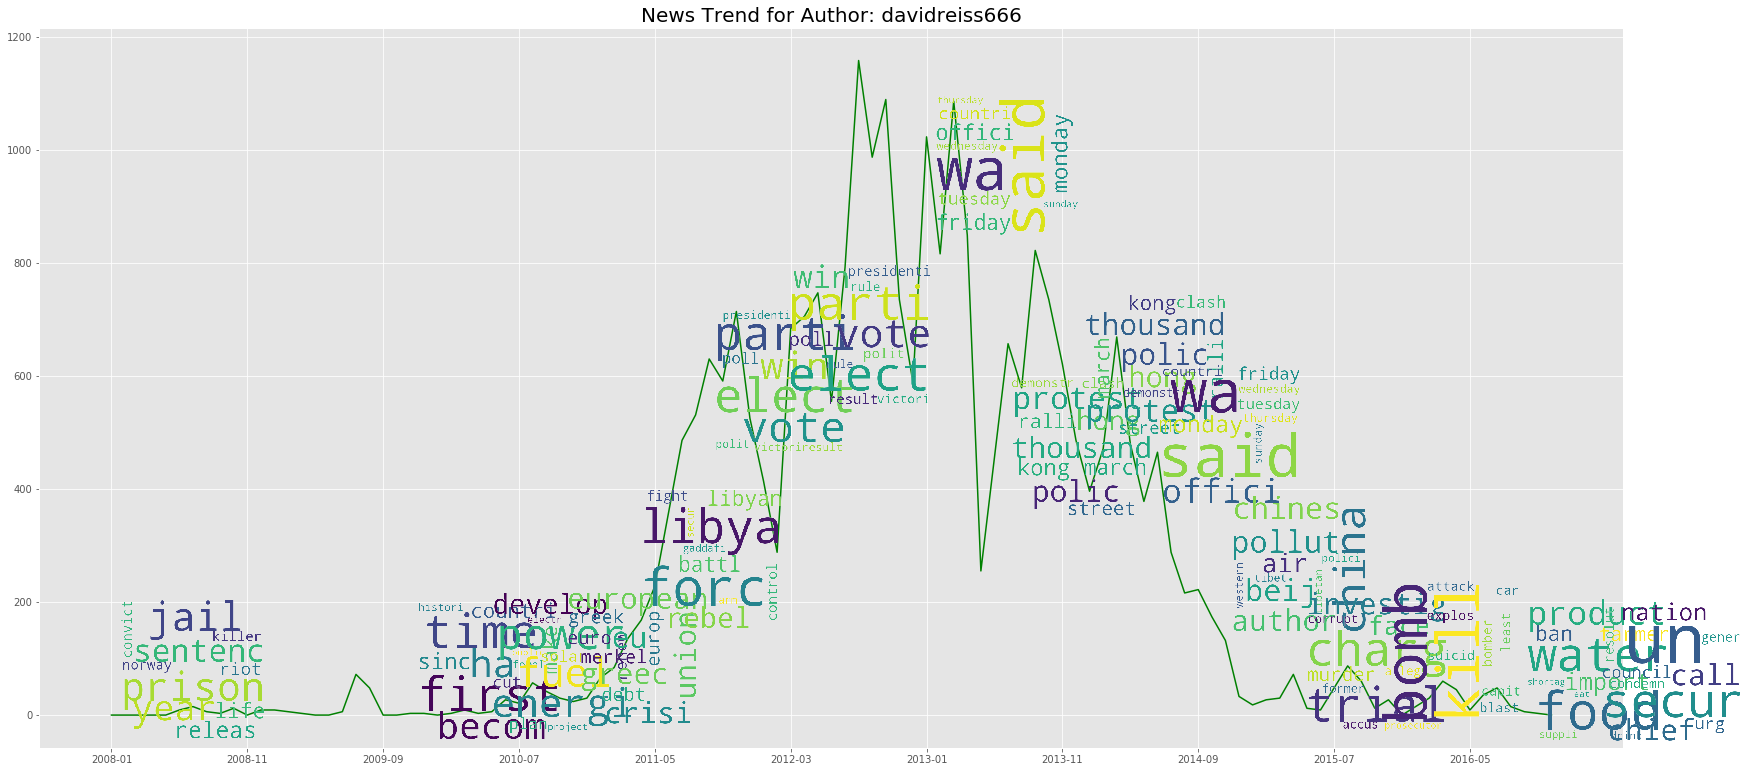

In [573]:
topic_list = []
for ds in time_stamp:
    topic_list.append(get_the_most_mentioned_topic_date(ds))
plot_news_distribution_with_topics(time_stamp,news_count,analysis_author,"green",topic_list)
#ds + ' : ' + str(get_the_most_mentioned_topic_date(ds)) + ' : '+str(get_the_most_popular_topic_date(ds)))